# 원하는 파일을 코랩 파일에 업로드하면 바로 진행가능합니다.
- 각 파일별로 진행코드를 모두 업로드했습니다.
* 코랩에서 진행가능

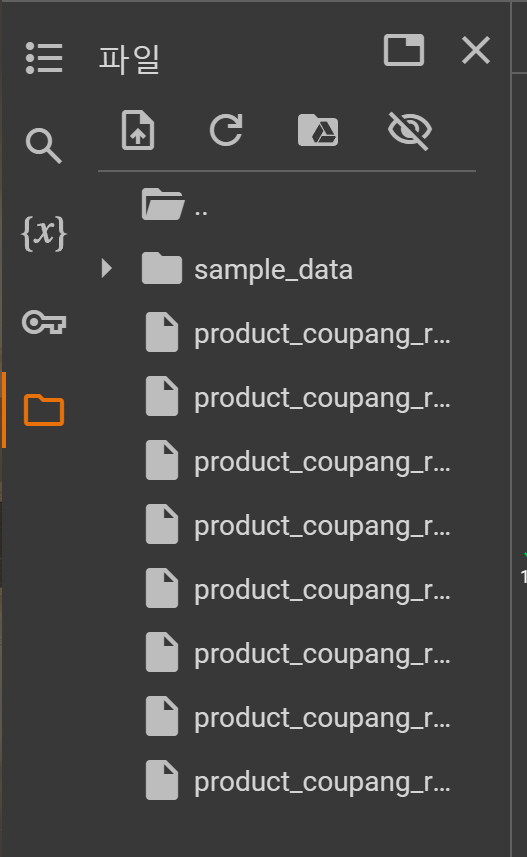

In [ ]:
!pip install konlpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import time
from konlpy.tag import Okt
from google.colab import files
from zipfile import ZipFile
import shutil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.4 MB/s eta 0:00:00


## 파일 하나일때

In [ ]:
# 데이터 불러오기
current_working_directory = os.getcwd()
file_name = 'product_coupang_review_2024H1.csv'
output_file = os.path.join(current_working_directory, file_name)
df = pd.read_csv(output_file)

# 데이터 기본 정보 확인
print(df.info())

# 결측치 확인
print(df.isnull().sum())

# 기본 통계량 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          1089 non-null   object
 1   review       1089 non-null   object
 2   review_date  1089 non-null   object
 3   rate         1089 non-null   int64 
 4   date         1089 non-null   int64 
 5   time         1089 non-null   object
dtypes: int64(2), object(4)
memory usage: 51.2+ KB
None
url            0
review         0
review_date    0
rate           0
date           0
time           0
dtype: int64
              rate        date
count  1089.000000      1089.0
mean      4.877870  20240620.0
std       0.412084         0.0
min       1.000000  20240620.0
25%       5.000000  20240620.0
50%       5.000000  20240620.0
75%       5.000000  20240620.0
max       5.000000  20240620.0


In [ ]:
df.head()

,url,review,review_date,rate,date,time
0,https://www.coupang.com/vp/products/6586372374...,"종근당건강 프로메가 오메가3 트리플 장용성, 60정, 1개 후기.\n\n요새 눈이 ...",2024.06.17,5,20240620,17:48:35
1,https://www.coupang.com/vp/products/6586372374...,<내돈내산 솔직후기>\n저의 솔직한 리뷰가 구매하시는 분들께 도움이 되길 바랍니다❤...,2024.06.16,5,20240620,17:48:35
2,https://www.coupang.com/vp/products/6586372374...,저희집 오메가입니다.\n가족들 모두 오메가를 먹는데 어취향 장난아녔거든요.\n일부러...,2024.06.14,5,20240620,17:48:35
3,https://www.coupang.com/vp/products/6586372374...,안녕하세요.\n최대한 솔직한 후기를 쓰기 위해 노력하고 있습니다.\n많은 참고가 되...,2024.06.14,5,20240620,17:48:35
4,https://www.coupang.com/vp/products/6586372374...,안녕하세요 :) 종근당건강 프로메가 오메가3 트리플 장용성 제품에 대한 내돈내산리뷰...,2024.06.10,5,20240620,17:48:35


In [ ]:
# 날짜 형식 변환 및 월-일 형식으로 저장 필요시
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['review_date'] = pd.to_datetime(df['review_date'], format='%Y.%m.%d')

In [ ]:
# /n, 특수문자, 공백 제거 함수
def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [ ]:
df['review'] = df['review'].apply(clean_text)

In [ ]:
# 파일 로컬에 저장
df.to_csv(file_name, index=False)
files.download(file_name)

In [ ]:
print(df.head())
print(df.info())

                                                 url  \
0  https://www.coupang.com/vp/products/6586372374...   
1  https://www.coupang.com/vp/products/6586372374...   
2  https://www.coupang.com/vp/products/6586372374...   
3  https://www.coupang.com/vp/products/6586372374...   
4  https://www.coupang.com/vp/products/6586372374...   

                                              review review_date  rate  \
0  종근당건강 프로메가 오메가3 트리플 장용성, 60정, 1개 후기.\n\n요새 눈이 ...  2024-06-17     5   
1  <내돈내산 솔직후기>\n저의 솔직한 리뷰가 구매하시는 분들께 도움이 되길 바랍니다❤...  2024-06-16     5   
2  저희집 오메가입니다.\n가족들 모두 오메가를 먹는데 어취향 장난아녔거든요.\n일부러...  2024-06-14     5   
3  안녕하세요.\n최대한 솔직한 후기를 쓰기 위해 노력하고 있습니다.\n많은 참고가 되...  2024-06-14     5   
4  안녕하세요 :) 종근당건강 프로메가 오메가3 트리플 장용성 제품에 대한 내돈내산리뷰...  2024-06-10     5   

        date                time  \
0 2024-06-20 1900-01-01 17:48:35   
1 2024-06-20 1900-01-01 17:48:35   
2 2024-06-20 1900-01-01 17:48:35   
3 2024-06-20 1900-01-01 17:48:35   
4 2024-06-20 1900-01-01 17:48:35   

 

## 감정분석용 전처리

In [ ]:
# 불용어 리스트
stopwords = set(["그", "이", "저", "것", "들", "의", "에", "를", "가", "은", "는", "이다", "하다"])
okt = Okt()

# /n, 특수문자, 공백, 불용어 제거 함수
def clean_and_tokenize(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    tokens = okt.morphs(text)
    cleaned_tokens = [token for token in tokens if token not in stopwords]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [ ]:
%%time
# 임시 폴더 생성
current_working_directory = os.getcwd()
temp_folder = os.path.join(current_working_directory, 'temp_processed_files')
os.makedirs(temp_folder, exist_ok=True)
csv_files = [file for file in os.listdir(current_working_directory) if file.endswith('.csv')]
print(csv_files)

# 모든 CSV 파일 처리
for file in csv_files:
    file_path = os.path.join(current_working_directory, file)
    df = pd.read_csv(file_path)
    df['clean_review'] = df['review'].apply(clean_and_tokenize)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['review_date'] = pd.to_datetime(df['review_date'], format='%Y.%m.%d')

    # 전처리된 데이터 저장
    output_file = os.path.join(temp_folder, f'processed_{file}')
    df.to_csv(output_file, index=False)
    print(f"Processed file saved as: {output_file}")

# 압축 파일 생성
zip_name = 'processed_copang_review_files.zip'
zip_filename = os.path.join(current_working_directory, zip_name)
with ZipFile(zip_filename, 'w') as zipf:
    for root, _, files in os.walk(temp_folder):
        for file in files:
            zipf.write(os.path.join(root, file), file)

# 임시 폴더 삭제
shutil.rmtree(temp_folder)

['product_coupang_review_2024Q2.csv', 'product_coupang_review_202405.csv', 'product_coupang_review_202402.csv', 'product_coupang_review_202403.csv', 'product_coupang_review_2024H1.csv', 'product_coupang_review_2024Q1.csv', 'product_coupang_review_202406.csv', 'product_coupang_review_202404.csv', 'product_coupang_review_202401.csv']
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_2024Q2.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_202405.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_202402.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_202403.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_2024H1.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_review_2024Q1.csv
Processed file saved as: /content/temp_processed_files/processed_product

In [ ]:
# 데이터 기본 정보 확인
current_working_directory = os.getcwd()
file_name = 'keyword_2024Q2.csv'
output_file = os.path.join(current_working_directory, file_name)
df = pd.read_csv(output_file)
print(df.info())
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     100 non-null    int64 
 1   rank     100 non-null    int64 
 2   keyword  100 non-null    object
 3   Quarter  100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
None
   date  rank keyword Quarter
0  2024     1     오메가      Q2
1  2024     2   콘드로이친      Q2
2  2024     3     루테인      Q2
3  2024     4     콜라겐      Q2
4  2024     5  단백질쉐이크      Q2


## 감정분석이 필요없는 파일용 전처리

#### 인기검색어
- keyword 폴더에 파일을 저장해서 올려놓고 진행했습니다.
- 진행이 안될시 keyword폴더를 만들고 그폴더에 csv파일넣고 진행하면됩니다.

In [ ]:
# 현재 작업 디렉토리와 키워드 폴더 경로 설정
current_working_directory = os.getcwd()
keyword_folder = os.path.join(current_working_directory, 'keyword')

# 키워드 폴더 내 모든 CSV 파일 목록 가져오기
csv_files = [file for file in os.listdir(keyword_folder) if file.endswith('.csv')]

FileNotFoundError: [Errno 2] No such file or directory: '/content/keyword'

In [ ]:
# /n, 특수문자, 공백 제거 함수
def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [ ]:
%%time
# 임시 폴더 생성
temp_folder = os.path.join(keyword_folder, 'temp_processed_files')
os.makedirs(temp_folder, exist_ok=True)

# 모든 CSV 파일 처리
for file in csv_files:
    file_path = os.path.join(keyword_folder, file)
    df = pd.read_csv(file_path)
    df['keyword'] = df['keyword'].apply(clean_text)

    # 전처리된 데이터 저장
    output_file = os.path.join(temp_folder, f'processed_{file}')
    df.to_csv(output_file, index=False)
    print(f"Processed file saved as: {output_file}")

# 압축 파일 생성
zip_name = 'processed_files.zip'
zip_filename = os.path.join(keyword_folder, zip_name)
with ZipFile(zip_filename, 'w') as zipf:
    for root, _, files in os.walk(temp_folder):
        for file in files:
            zipf.write(os.path.join(root, file), file)

# 임시 폴더 삭제
shutil.rmtree(temp_folder)

Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202403.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202406.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202404_top10.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_2024H1.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202405.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202401.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_2024Q1.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_202402.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_2024Q1_top10.csv
Processed file saved as: /content/keyword/temp_processed_files/processed_keyword_2024H1_top10.csv
Processed file saved as: /content/keyword/temp_processed_files

In [ ]:
# # 날짜 형식 변환 및 월-일 형식으로 저장 필요시
# df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# df['review_date'] = pd.to_datetime(df['review_date'], format='%Y.%m.%d')
# df['time'] = pd.to_datetime(df['time'], format="%H:%M:%S")

#### 상품

In [ ]:
# 현재 작업 디렉토리와 키워드 폴더 경로 설정
current_working_directory = os.getcwd()

# 키워드 폴더 내 모든 CSV 파일 목록 가져오기
csv_files = [file for file in os.listdir(current_working_directory) if file.endswith('.csv')]

In [ ]:
# /n, 특수문자, 공백 제거 함수
def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

In [ ]:
for file in csv_files:
    file_path = os.path.join(current_working_directory, file)
    df = pd.read_csv(file_path)
    print(df.info())
    print(df.head(2))

In [ ]:
%%time
# 임시 폴더 생성
temp_folder = os.path.join(current_working_directory, 'temp_processed_files')
os.makedirs(temp_folder, exist_ok=True)

# 모든 CSV 파일 처리
for file in csv_files:
    file_path = os.path.join(current_working_directory, file)
    df = pd.read_csv(file_path)
    df['keyword'] = df['keyword'].apply(clean_text)
    df['sorting'] = df['sorting'].apply(clean_text)
    df['name'] = df['name'].apply(clean_text)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['price'] = df['price'].apply(lambda x: int(re.sub(r',', '', x)))

    # 전처리된 데이터 저장
    output_file = os.path.join(temp_folder, f'processed_{file}')
    df.to_csv(output_file, index=False)
    print(f"Processed file saved as: {output_file}")

# 압축 파일 생성
zip_name = 'processed_product_copang_files.zip'
zip_filename = os.path.join(current_working_directory, zip_name)
with ZipFile(zip_filename, 'w') as zipf:
    for root, _, files in os.walk(temp_folder):
        for file in files:
            zipf.write(os.path.join(root, file), file)

# 임시 폴더 삭제
shutil.rmtree(temp_folder)

Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024H1.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024M1.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024M4_top5.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024H1_top5.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024Q1_top5.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024Q2_top5.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024M5.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_2024M2.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_202406.csv
Processed file saved as: /content/temp_processed_files/processed_product_coupang_202406_top5.csv
Processed file saved as: /content/temp_processed_files/

In [ ]:
# # 날짜 형식 변환 및 월-일 형식으로 저장 필요시
# df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# df['review_date'] = pd.to_datetime(df['review_date'], format='%Y.%m.%d')
# df['time'] = pd.to_datetime(df['time'], format="%H:%M:%S")